## SQL Project description

The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers.
We have a database of one of the services competing in this market. It contains data on books, publishers, authors, and customer ratings and reviews of books. This information will be used to generate a value proposition for a new product.


### Describe the goals of the study.

The goals of analysis are:
1. Studing the data about books, publishers, authors, and customer ratings and reviews of books.
2. Finding the most popular publishers.
3. Identifying the best authors based on high rating
4. Counting the average text reviews for for frequently commenting users.
5. Making suggestions.


### Study the tables (print the first rows).

In [1]:

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

db_config = {'user': 'practicum_student',         # username
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})


In [2]:
query = ''' SELECT 
                *
            FROM books
            LIMIT 10'''
books = pd.io.sql.read_sql(query, con = engine)
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In the table "books" we can find 6 columns with information about book id, author id, number of pages in the books, publication date and publisher id. The primary key of the table is book_id.

In [3]:
query = ''' SELECT 
                *
            FROM authors
            LIMIT 10'''
authors = pd.io.sql.read_sql(query, con = engine)
authors.head()


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In the table "authors" we see 2 columns with information about authors an their id's. The primary key of the table is author_id.

In [4]:
query = ''' SELECT 
                *
            FROM publishers
            LIMIT 10'''
publishers = pd.io.sql.read_sql(query, con = engine)
publishers.head()


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In the table "publishers" we see 2 columns with information about publishers an their id's. The primary key of the table is publisher_id.

In [5]:
query = ''' SELECT 
                *
            FROM ratings
            LIMIT 10'''
ratings = pd.io.sql.read_sql(query, con = engine)
ratings.head()


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


The table ratings consits of 4 columns with information about book id, rating id, username and rating. The primary key of the table is rating_id.

In [6]:
query = ''' SELECT 
                *
            FROM reviews
            LIMIT 10'''
reviews = pd.io.sql.read_sql(query, con = engine)
reviews.head()


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


The table reviews consits of 4 columns with information about book id, review id, username and text of review. The primary key of the table is review_id.

### Find the number of books released after January 1, 2000.

In [7]:
query = '''SELECT 
            COUNT(book_id) AS cnt
            FROM
            books
            WHERE 
            publication_date::date >= '2000-01-01';
        '''
            
count_books = pd.io.sql.read_sql(query, con = engine)
count_books

,cnt
0,821


We have 821 books released since 01.01.2000.

In [8]:
query = '''SELECT 
            COUNT(book_id) AS cnt
            FROM
            books
            WHERE 
            publication_date::date > '2000-01-01';
        '''
            
count_books1 = pd.io.sql.read_sql(query, con = engine)
count_books1

,cnt
0,819


We have 819 books released after 01.01.2000.

### Find the number of user reviews and the average rating for each book.

In [9]:
query = '''SELECT 
                ratings.book_id AS book_id,
                books.title as title,
                AVG(ratings.rating) as average_rating,
                COUNT(reviews.review_id) as amount_reviews
            FROM 
                ratings
                INNER JOIN reviews ON reviews.book_id = ratings.book_id
                INNER JOIN books ON books.book_id = ratings.book_id
                
            GROUP BY 
                ratings.book_id,
                books.title
            ORDER BY
                average_rating DESC;'''
reviews_and_ratings = pd.io.sql.read_sql(query, con = engine)
reviews_and_ratings.head()

,book_id,title,average_rating,amount_reviews
0,901,The Walking Dead Book One (The Walking Dead #...,5.0,4
1,518,Pop Goes the Weasel (Alex Cross #5),5.0,4
2,444,Moneyball: The Art of Winning an Unfair Game,5.0,9
3,913,The Woman in Black,5.0,4
4,169,Crucial Conversations: Tools for Talking When ...,5.0,4


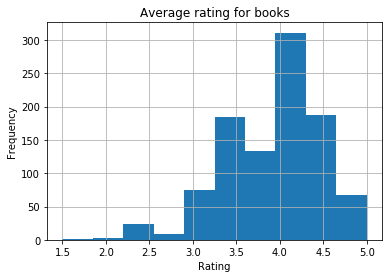

In [10]:
reviews_and_ratings['average_rating'].hist()
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.title('Average rating for books')
plt.show()

We can conclude that the most of books have rating in the range 3.9 - 4.3 (more than 300 estimates) and rarely there is a rating lower than 2.9. Approximately the same number of estimates as 3.5 and 4.5 - the number of estimates tends to 200. At the same time, estimates close to 3 and after 4.6 are much less common - about 65-75.

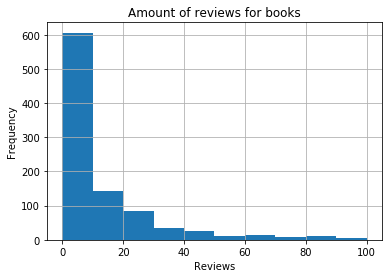

In [11]:
reviews_and_ratings['amount_reviews'].hist(bins=10, range=(0,100))
plt.ylabel('Frequency')
plt.xlabel('Reviews')
plt.title('Amount of reviews for books')
plt.show()

We can note that no more than 10 reviews are written for the absolute majority of books. After that, the number of reviews on the book is sharply reduced and begins to tend to zero.

### Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).

In [12]:
query = '''SELECT 
                publishers.publisher as publisher,
                COUNT(books.book_id) as books_cnt
            FROM 
                books
            LEFT JOIN publishers 
                            ON
                publishers.publisher_id = books.publisher_id
            WHERE 
                books.num_pages > 50
            GROUP BY
                publishers.publisher
            ORDER BY
                books_cnt DESC
            LIMIT 1;'''
num_pages_more_than_50 = pd.io.sql.read_sql(query, con = engine)
num_pages_more_than_50.head()

,publisher,books_cnt
0,Penguin Books,42


The publisher who has released the greatest number of books is Penguin Books.

### Identify the author with the highest average book rating: look only at books with at least 50 ratings.

In [13]:
query = '''SELECT 
                books.author_id AS author_id,
                authors.author AS authors,
                COUNT (ratings.rating_id) AS cnt,
                AVG (ratings.rating) AS avg
            FROM
                books
                INNER JOIN authors ON authors.author_id = books.author_id
                INNER JOIN ratings ON ratings.book_id = books.book_id
            GROUP BY 
                authors.author_id,
                books.author_id
            HAVING
                COUNT(ratings.rating_id) > 50
            ORDER BY 
                avg DESC
            LIMIT 1;'''
authors_with_high_rating = pd.io.sql.read_sql(query, con = engine)
authors_with_high_rating.head()

,author_id,authors,cnt,avg
0,236,J.K. Rowling/Mary GrandPré,312,4.288462


The author with the highest average book rating is J.K. Rowling/Mary GrandPré.

### Find the average number of text reviews among users who rated more than 50 books.

In [14]:
query = '''SELECT 
                
                AVG (Sub_count.cnt_text) as avg_cnt_text
                
            FROM
                (SELECT
                    count(distinct reviews.text) as cnt_text
                 FROM
                     (SELECT
                         username,
                         COUNT(ratings.book_id) as cnt_books
                      FROM
                      ratings
                 GROUP BY 
                     username
                 HAVING
                     COUNT(ratings.book_id) > 50) AS Sub
            INNER JOIN reviews ON reviews.username = Sub.username
            GROUP BY 
                Sub.username) as Sub_count'''
                
avg = pd.io.sql.read_sql(query, con = engine)
avg.head()

,avg_cnt_text
0,24.333333


Users who rated more than 50 books write 24.3 reviews in average .

## General conclusion

We studied five tables and found that:
1. There were 821 books released after 01.01.2000.
2. The most of books have rating in the range 3.9 - 4.3.
3. There were no more than 10 reviews are written for the absolute majority of books. 
4. The greatest publisher by number of books is Penguin Books.
5. The most popular author is J.K. Rowling/Mary GrandPré.
6. The most active users leave 24.3 reviews on average.
Based on the data obtained, it is possible to recommend discussing with the author J.K. Rowling/Mary GrandPré the writing of the book and its publication in the Penguin Books publishing house. And regarding the choice of topic / genre,  can arrange a survey of the most active reviewers on the theme: which books receive a higher rating and good text reviews.